# Read Datafile

In [1]:
import pandas as pd
import math
import gzip
import csv
import sys

In [2]:
duolingo_data = pd.read_csv(r'C:\Users\Alexander\Dropbox\halflife_regression_rl\0_data/learning_traces.13m.csv')

In [3]:
# Constants
MIN_HALF_LIFE = 15.0 / (24 * 60)  # 15 minutes
MAX_HALF_LIFE = 274.0             # 9 months
LN2 = math.log(2)

def pclip(p):
    return min(max(p, 0.0001), 0.9999)

def hclip(h):
    return min(max(h, MIN_HALF_LIFE), MAX_HALF_LIFE)

# Convert time delta to days and calculate half-life
duolingo_data['p_recall'] = duolingo_data['p_recall'].apply(pclip)
duolingo_data['t'] = duolingo_data['delta'] / (60 * 60 * 24)
duolingo_data['h'] = duolingo_data.apply(lambda row: hclip(-row['t'] / (math.log(row['p_recall'], 2) if row['p_recall'] > 0 else float('inf'))), axis=1)
duolingo_data['lang'] = duolingo_data['ui_language'] + "->" + duolingo_data['learning_language']
# Feature vector creation based on method

duolingo_data['seen'] = duolingo_data['history_seen']
duolingo_data['right'] = duolingo_data['history_correct']
duolingo_data['wrong'] = duolingo_data['history_seen'] - duolingo_data['right']

duolingo_data['right_this'] = duolingo_data['session_correct']
duolingo_data['wrong_this'] = duolingo_data['session_seen']

duolingo_data['right'] = duolingo_data['right'].apply(lambda x: math.sqrt(1+x))
duolingo_data['wrong'] = (duolingo_data['wrong']).apply(lambda x: math.sqrt(1+x))

duolingo_data['a'] = (duolingo_data['right'] + 2) / (duolingo_data['seen'] + 4)

duolingo_data['lexeme'] = duolingo_data['learning_language'] + ":" + duolingo_data['lexeme_string']

duolingo_data['time'] = duolingo_data['t']

In [4]:
duolingo_data

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,...,h,lang,seen,right,wrong,right_this,wrong_this,a,lexeme,time
0,0.999900,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,...,274.000000,en->de,6,2.236068,1.732051,2,2,0.423607,de:lernt/lernen<vblex><pri><p3><sg>,320.018924
1,0.500000,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,...,274.000000,en->de,4,2.236068,1.000000,1,2,0.529508,de:die/die<det><def><f><sg><nom>,320.018924
2,0.999900,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,...,274.000000,en->de,5,2.236068,1.414214,1,1,0.470674,de:mann/mann<n><m><sg><nom>,320.018924
3,0.500000,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,...,274.000000,en->de,6,2.449490,1.414214,1,2,0.444949,de:frau/frau<n><f><sg><nom>,320.018924
4,0.999900,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,...,274.000000,en->de,4,2.236068,1.000000,1,1,0.529508,de:das/das<det><def><nt><sg><nom>,320.018924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854221,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,the/the<det><def><sp>,6,4,...,0.013230,it->en,6,2.236068,1.732051,4,5,0.423607,en:the/the<det><def><sp>,0.004259
12854222,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,eat/eat<vblex><pres>,4,4,...,0.013230,it->en,4,2.236068,1.000000,4,5,0.529508,en:eat/eat<vblex><pres>,0.004259
12854223,0.999900,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,bread/bread<n><sg>,4,4,...,29.521459,it->en,4,2.236068,1.000000,4,4,0.529508,en:bread/bread<n><sg>,0.004259
12854224,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,drink/drink<vblex><pres>,3,2,...,0.010417,it->en,3,1.732051,1.414214,3,5,0.533150,en:drink/drink<vblex><pres>,0.004259


In [5]:
en_duolingo = duolingo_data[duolingo_data['learning_language'] == 'en']
en_duolingo

,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,...,h,lang,seen,right,wrong,right_this,wrong_this,a,lexeme,time
87,0.999900,1362082504,357,u:dwbJ,en,pt,1052c3ace653dbc8923eaa183bc02b88,definition/definition<n><sg>,17,17,...,28.639024,pt->en,17,4.242641,1.000000,2,2,0.297269,en:definition/definition<n><sg>,0.004132
88,0.999900,1362082504,357,u:dwbJ,en,pt,9cba1b30f88bf3c047b22cffcaf88c12,surface/surface<n><sg>,19,19,...,28.639024,pt->en,19,4.472136,1.000000,3,3,0.281397,en:surface/surface<n><sg>,0.004132
89,0.999900,1362082504,357,u:dwbJ,en,pt,961cd149f20f2571419b1412d849f19a,scale/scale<n><sg>,21,20,...,28.639024,pt->en,21,4.582576,1.414214,3,3,0.263303,en:scale/scale<n><sg>,0.004132
90,0.800000,1362082504,357,u:dwbJ,en,pt,5cbb1249562e95794a4c4ae0e2d8ae26,temperature/temperature<n><sg>,44,36,...,0.012835,pt->en,44,6.082763,3.000000,4,5,0.168391,en:temperature/temperature<n><sg>,0.004132
91,0.999900,1362082504,357,u:dwbJ,en,pt,2df65bdf80d10d2b78d62cb2e0a731d8,distance/distance<n><sg>,21,20,...,28.639024,pt->en,21,4.582576,1.414214,3,3,0.263303,en:distance/distance<n><sg>,0.004132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12854221,0.800000,1363104897,368,u:i5D8,en,it,d5efc552aaea3109eb5388aa1ec8673d,the/the<det><def><sp>,6,4,...,0.013230,it->en,6,2.236068,1.732051,4,5,0.423607,en:the/the<det><def><sp>,0.004259
12854222,0.800000,1363104897,368,u:i5D8,en,it,a826c47947d68549fa81e19cafa57ba0,eat/eat<vblex><pres>,4,4,...,0.013230,it->en,4,2.236068,1.000000,4,5,0.529508,en:eat/eat<vblex><pres>,0.004259
12854223,0.999900,1363104897,368,u:i5D8,en,it,5e29d77697d23070a1fb92eb6c90e9b6,bread/bread<n><sg>,4,4,...,29.521459,it->en,4,2.236068,1.000000,4,4,0.529508,en:bread/bread<n><sg>,0.004259
12854224,0.600000,1363104897,368,u:i5D8,en,it,cdfecc9247566d40bb964a218c54c783,drink/drink<vblex><pres>,3,2,...,0.010417,it->en,3,1.732051,1.414214,3,5,0.533150,en:drink/drink<vblex><pres>,0.004259


In [6]:
en_duolingo['datetime'] = pd.to_datetime(en_duolingo['timestamp'], unit='s')
en_duolingo['datetime']

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_18856/1508079367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_duolingo['datetime'] = pd.to_datetime(en_duolingo['timestamp'], unit='s')


87         2013-02-28 20:15:04
88         2013-02-28 20:15:04
89         2013-02-28 20:15:04
90         2013-02-28 20:15:04
91         2013-02-28 20:15:04
                   ...        
12854221   2013-03-12 16:14:57
12854222   2013-03-12 16:14:57
12854223   2013-03-12 16:14:57
12854224   2013-03-12 16:14:57
12854225   2013-03-12 16:14:57
Name: datetime, Length: 5014791, dtype: datetime64[ns]

In [7]:
# Function to convert time to decimal hours
def time_to_decimal(time):
    return time.hour + time.minute / 60 + time.second / 3600

# Apply the function to the 'datetime' column
en_duolingo['decimal_hours'] = en_duolingo['datetime'].apply(lambda x: time_to_decimal(x))

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_18856/973745994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_duolingo['decimal_hours'] = en_duolingo['datetime'].apply(lambda x: time_to_decimal(x))


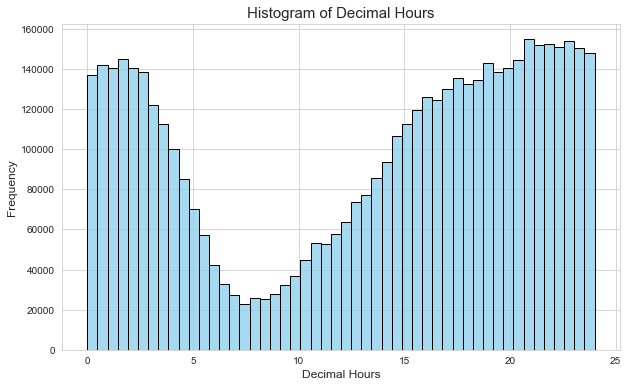

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(en_duolingo['decimal_hours'], bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Decimal Hours', fontsize=15)
plt.xlabel('Decimal Hours', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

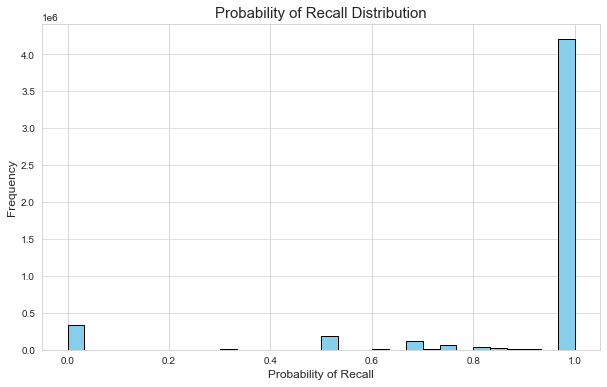

In [9]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.hist(en_duolingo['p_recall'], bins=30, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Probability of Recall Distribution', fontsize=15)
plt.xlabel('Probability of Recall', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Optional: Adding a grid for easier readability
plt.grid(axis='y', alpha=0.75)

plt.show()


In [10]:
def plot_histogram(data, column, bins=30, title=None, xlabel=None):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=bins, color='skyblue', edgecolor='black')
    plt.title(title or f'Histogram of {column}', fontsize=15)
    plt.xlabel(xlabel or column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', alpha=0.75)
    plt.show()


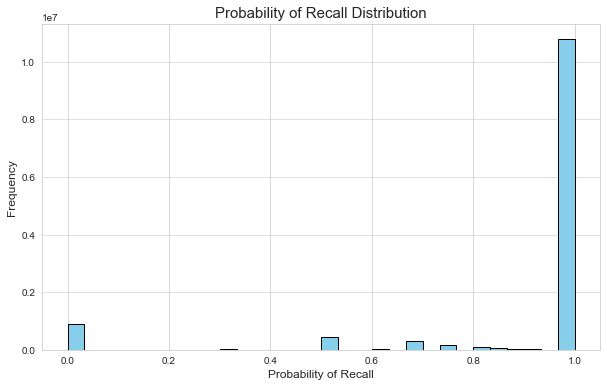

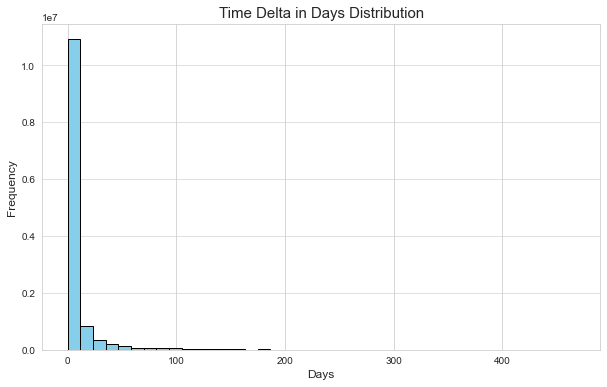

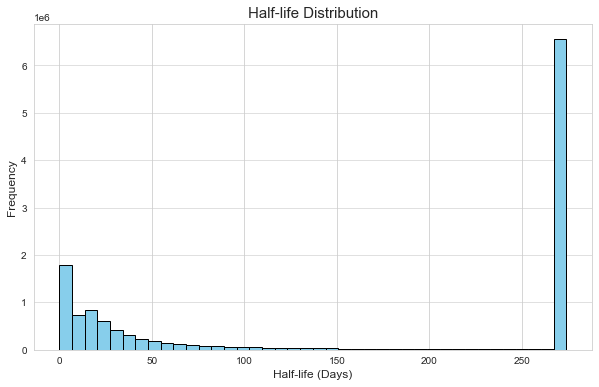

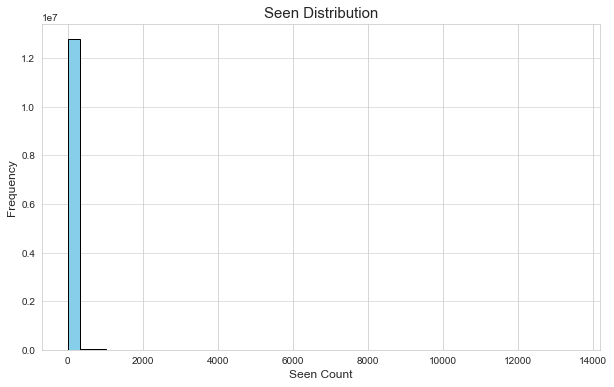

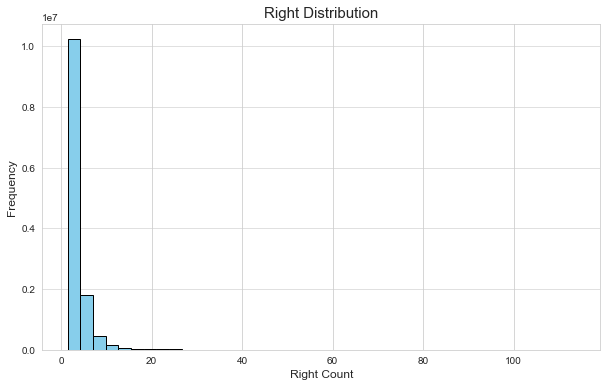

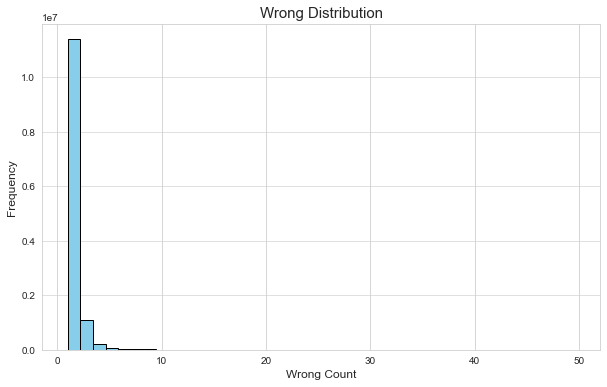

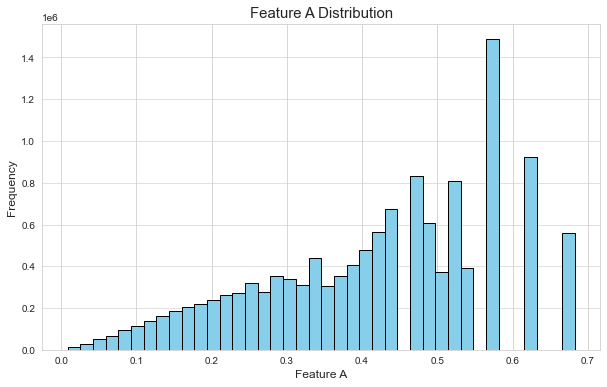

In [11]:
plot_histogram(duolingo_data, 'p_recall', title='Probability of Recall Distribution', xlabel='Probability of Recall')

plot_histogram(duolingo_data, 't', bins=40, title='Time Delta in Days Distribution', xlabel='Days')

plot_histogram(duolingo_data, 'h', bins=40, title='Half-life Distribution', xlabel='Half-life (Days)')

# Similarly, for other variables like 'seen', 'right', 'wrong', 'a'
plot_histogram(duolingo_data, 'seen', bins=40, title='Seen Distribution', xlabel='Seen Count')

plot_histogram(duolingo_data, 'right', bins=40, title='Right Distribution', xlabel='Right Count')

plot_histogram(duolingo_data, 'wrong', bins=40, title='Wrong Distribution', xlabel='Wrong Count')

plot_histogram(duolingo_data, 'a', bins=40, title='Feature A Distribution', xlabel='Feature A')


In [12]:
en_duolingo['datetime']

87         2013-02-28 20:15:04
88         2013-02-28 20:15:04
89         2013-02-28 20:15:04
90         2013-02-28 20:15:04
91         2013-02-28 20:15:04
                   ...        
12854221   2013-03-12 16:14:57
12854222   2013-03-12 16:14:57
12854223   2013-03-12 16:14:57
12854224   2013-03-12 16:14:57
12854225   2013-03-12 16:14:57
Name: datetime, Length: 5014791, dtype: datetime64[ns]

In [13]:
import pandas as pd

# Assuming en_duolingo['datetime'] is a string representing datetime
en_duolingo['date_only'] = pd.to_datetime(en_duolingo['datetime']).dt.date
en_duolingo['date_only']

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_18856/3114378611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_duolingo['date_only'] = pd.to_datetime(en_duolingo['datetime']).dt.date


87          2013-02-28
88          2013-02-28
89          2013-02-28
90          2013-02-28
91          2013-02-28
               ...    
12854221    2013-03-12
12854222    2013-03-12
12854223    2013-03-12
12854224    2013-03-12
12854225    2013-03-12
Name: date_only, Length: 5014791, dtype: object

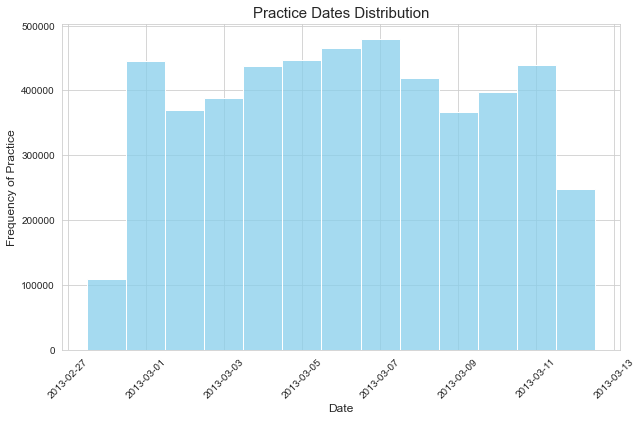

In [14]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(en_duolingo['date_only'], bins=30, kde=False, color='skyblue')
plt.title('Practice Dates Distribution', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency of Practice', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()


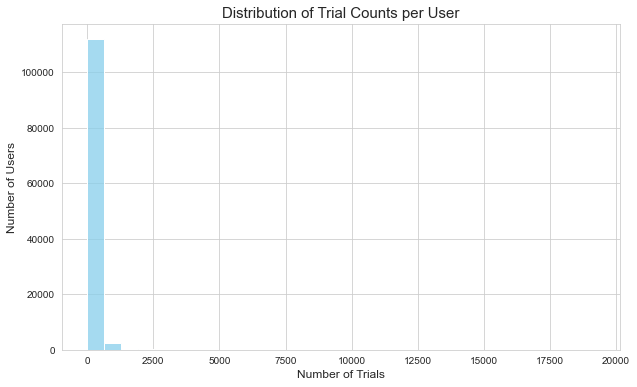

In [15]:
user_trials = duolingo_data.groupby('user_id').size().reset_index(name='trial_count')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(user_trials['trial_count'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Trial Counts per User', fontsize=15)
plt.xlabel('Number of Trials', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()


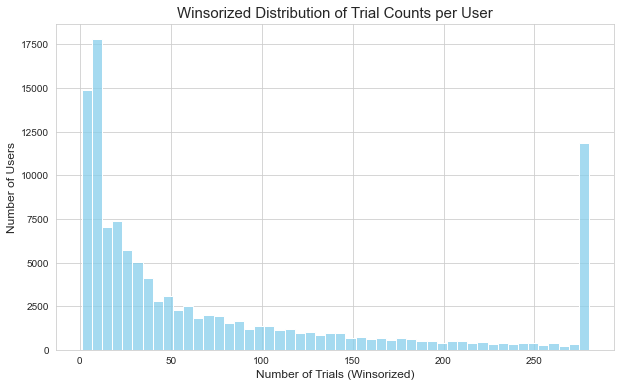

In [16]:
from scipy.stats.mstats import winsorize
# Winsorizing at the 99th percentile
user_trials['trial_count_winsorized'] = winsorize(user_trials['trial_count'], limits=[0, 0.1])
plt.figure(figsize=(10, 6))
sns.histplot(user_trials['trial_count_winsorized'], bins=50, color='skyblue')
plt.title('Winsorized Distribution of Trial Counts per User', fontsize=15)
plt.xlabel('Number of Trials (Winsorized)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()


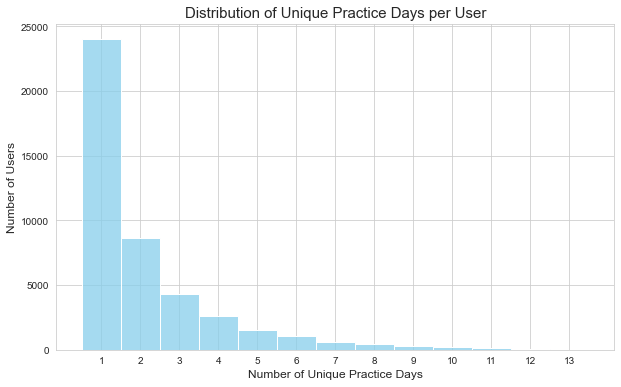

In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'date_only' is already a date column
# Count unique dates for each user
unique_practice_days = en_duolingo.groupby('user_id')['date_only'].nunique().reset_index(name='unique_days')

plt.figure(figsize=(10, 6))
# Set discrete=True for treating the variable as categorical
sns.histplot(unique_practice_days['unique_days'], discrete=True, kde=False, color='skyblue')
plt.title('Distribution of Unique Practice Days per User', fontsize=15)
plt.xlabel('Number of Unique Practice Days', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(range(1, 14))  # Assuming the range is from 1 to 15 days
plt.show()


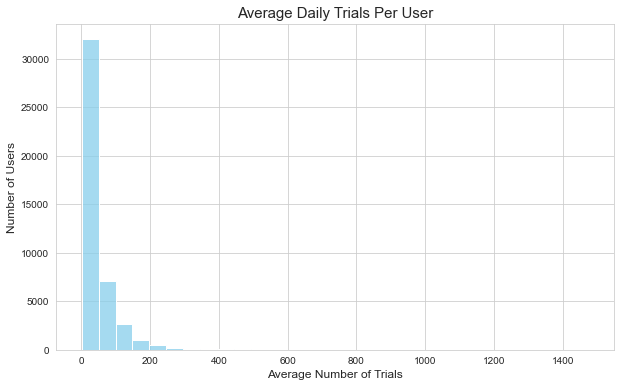

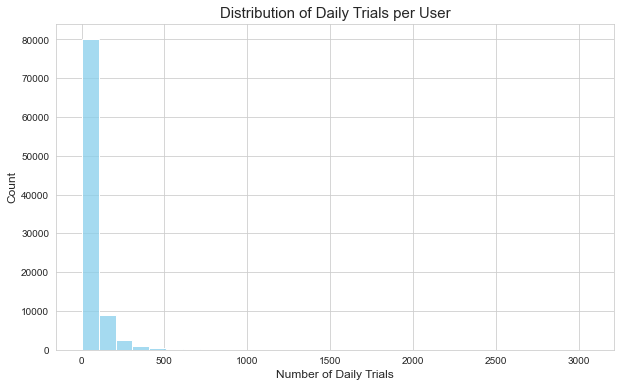

In [271]:
# Count the number of trials per user per day
trials_per_user_per_day = en_duolingo.groupby(['user_id', 'date_only']).size().reset_index(name='daily_trials')
# Option 1: Average number of daily trials per user
avg_trials_per_user = trials_per_user_per_day.groupby('user_id')['daily_trials'].mean()

import seaborn as sns
import matplotlib.pyplot as plt

# Option 1: Plotting average daily trials per user
plt.figure(figsize=(10, 6))
sns.histplot(avg_trials_per_user, bins=30, kde=False, color='skyblue')
plt.title('Average Daily Trials Per User', fontsize=15)
plt.xlabel('Average Number of Trials', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()

# Option 2: Plotting the distribution of all daily trials counts
plt.figure(figsize=(10, 6))
sns.histplot(trials_per_user_per_day['daily_trials'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Daily Trials per User', fontsize=15)
plt.xlabel('Number of Daily Trials', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


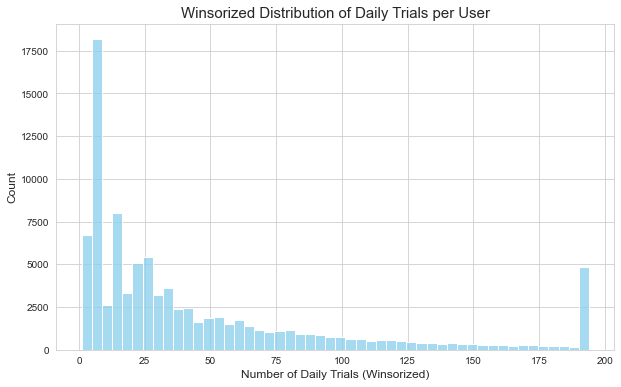

In [272]:
# Winsorizing at the 99th percentile
trials_per_user_per_day['daily_trials_winsorized'] = winsorize(trials_per_user_per_day['daily_trials'], limits=[0, 0.05])
plt.figure(figsize=(10, 6))
sns.histplot(trials_per_user_per_day['daily_trials_winsorized'], bins=50, kde=False, color='skyblue')
plt.title('Winsorized Distribution of Daily Trials per User', fontsize=15)
plt.xlabel('Number of Daily Trials (Winsorized)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


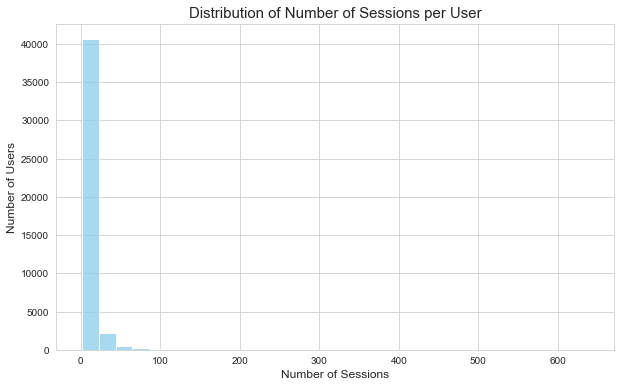

In [273]:
# Count unique sessions per user
sessions_per_user = en_duolingo.groupby('user_id')['datetime'].nunique().reset_index(name='session_count')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(sessions_per_user['session_count'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Number of Sessions per User', fontsize=15)
plt.xlabel('Number of Sessions', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()


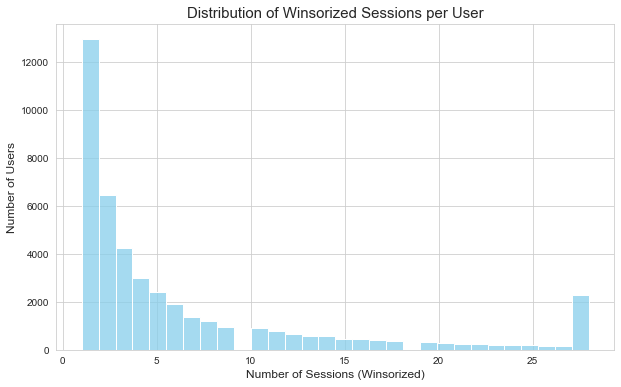

In [274]:
from scipy.stats.mstats import winsorize

# Winsorizing at the 99th percentile
sessions_per_user['session_count_winsorized'] = winsorize(sessions_per_user['session_count'], limits=[0, 0.05])
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(sessions_per_user['session_count_winsorized'], bins=30, kde=False, color='skyblue')
plt.title('Distribution of Winsorized Sessions per User', fontsize=15)
plt.xlabel('Number of Sessions (Winsorized)', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.show()


In [275]:
en_duolingo.columns

Index(['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language',
       'ui_language', 'lexeme_id', 'lexeme_string', 'history_seen',
       'history_correct', 'session_seen', 'session_correct', 't', 'h', 'lang',
       'seen', 'right', 'wrong', 'right_this', 'wrong_this', 'a', 'lexeme',
       'time', 'datetime', 'decimal_hours', 'date_only'],
      dtype='object')

# Summary Statistics

In [276]:
variables = ['p_recall', 't', 'seen', 'right', 'wrong', 'decimal_hours']
summary_stats = en_duolingo[variables].describe().round(2)
summary_stats

,p_recall,t,seen,right,wrong,decimal_hours
count,5014791.00,5014791.00,5014791.00,5014791.00,5014791.00,5014791.00
mean,0.90,7.61,34.31,3.92,1.65,13.29
std,0.27,22.57,201.39,3.94,1.66,7.74
min,0.00,0.00,1.00,1.41,1.00,0.00
25%,1.00,0.01,4.00,2.00,1.00,4.74
50%,1.00,0.49,8.00,2.83,1.41,15.45
75%,1.00,4.33,19.00,4.24,1.73,19.99
max,1.00,431.10,13518.00,113.53,49.58,24.00


In [277]:
# sns.regplot(data=en_duolingo, x="decimal_hours", y="p_recall", order = 2)

In [278]:
cols_to_order = ['user_id', 'datetime', 'date_only', 'delta', 'lexeme_string']
new_columns = cols_to_order + [col for col in en_duolingo.columns if col not in cols_to_order]

en_duolingo = en_duolingo[new_columns]

In [279]:
# Splitting the 'lexeme_string' column on '/'
en_duolingo['word'] = en_duolingo['lexeme_string'].str.split('/').str[0]

C:\Users\ALEXAN~1\AppData\Local\Temp/ipykernel_58924/2240442489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_duolingo['word'] = en_duolingo['lexeme_string'].str.split('/').str[0]


In [280]:
# Sorting the DataFrame by 'user_id' and 'datetime'
en_duolingo_sorted = en_duolingo.sort_values(by=['user_id', 'datetime'])

In [282]:
# Assuming your DataFrame is named 'df'
en_duolingo.to_csv('en_duolingo.csv', index=False)